In [2]:
import numpy as np

# --- 既存の読み込み処理 ---
data = "FashionMNIST"
original_path = f"../../data/{data}/CWALDP/fmnist_full_L4_PI0.25.npz"
dat = np.load(original_path, allow_pickle=True)
X_all = np.asarray(dat["X_disc"])
y_all = np.asarray(dat["y_disc"] if "y_disc" in dat.files else dat["y_all"])

# --- ユニークな画像の頻度を集計する処理 ---

# 1. 画像データを1次元にフラット化（重複判定のため）
# (N, H, W) や (N, C, H, W) の形状を (N, -1) に変換します
X_flat = X_all.reshape(X_all.shape[0], -1)

# 2. ユニークな画像とそのインデックスを取得
# return_index=True で、各ユニーク画像が最初に出現した位置を取得します
_, unique_indices = np.unique(X_flat, axis=0, return_index=True)

# 3. ユニークなものだけにフィルタリング
X_unique = X_all[unique_indices]
y_unique = y_all[unique_indices]

# 4. ラベルごとの頻度をカウント
labels, counts = np.unique(y_unique, return_counts=True)

# 5. 結果の表示
print(f"全データ数: {len(X_all)}")
print(f"ユニークデータ総数: {len(X_unique)}")
print("-" * 30)
print("ラベル | ユニーク画像数")
for label, count in zip(labels, counts):
    print(f"{label:6} | {count}")

全データ数: 70000
ユニークデータ総数: 64917
------------------------------
ラベル | ユニーク画像数
     0 | 6240
     1 | 6145
     2 | 6583
     3 | 6659
     4 | 6694
     5 | 6313
     6 | 6349
     7 | 6026
     8 | 6952
     9 | 6956


In [4]:
70000- 64917

5083

In [5]:
pow(2,196)

100433627766186892221372630771322662657637687111424552206336

In [ ]:
import numpy as np
import umap
import matplotlib.pyplot as plt

# --- 既存の読み込み処理 (省略) ---
# X_all: (n_samples, height, width) または (n_samples, features)
# y_all: (n_samples,)
X_all = np.asarray(dat["X_disc"])
y_all = np.asarray(dat["y_disc"] if "y_disc" in dat.files else dat["y_all"])
# 1. データの平坦化
# UMAPは [サンプル数, 特徴量数] の2次元配列を入力として期待します
n_samples = X_all.shape[0]
X_flat = X_all.reshape(n_samples, -1)

# 2. UMAPの実行
# n_neighbors: 局所的な構造（小さい値）か大域的な構造（大きい値）のどちらを重視するか
# min_dist: 埋め込み空間でのポイント間の最小距離
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(X_flat)





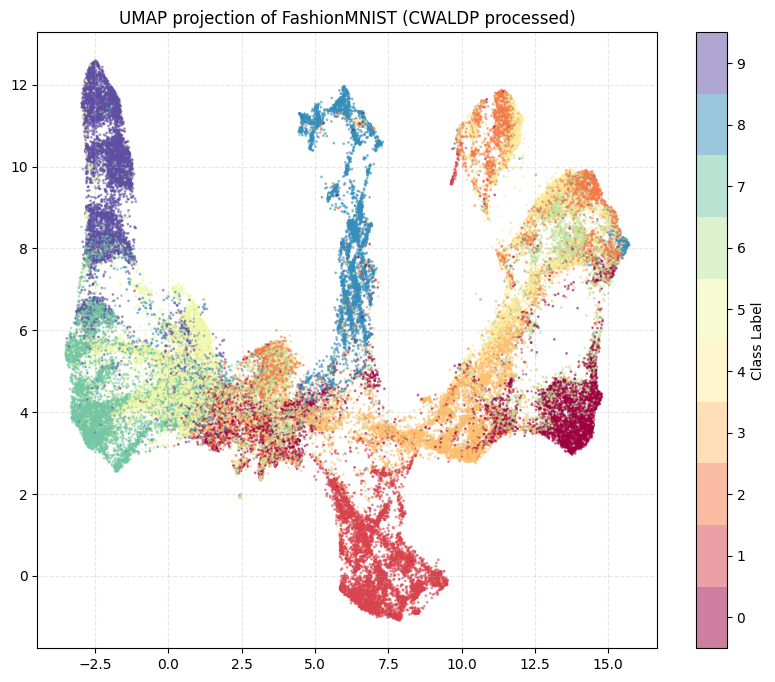

In [9]:
# 3. プロットの作成
# データのラベル (y_all) に基づいて色分けします
# 4. 可視化（重ねて表示）
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_all, cmap='Spectral', s=1, alpha=0.5)

# カラーバーの設定（FashionMNISTのクラス 0-9 に対応）
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_label('Class Label')

plt.title(f'UMAP projection of {data} (CWALDP processed)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

/tmp/ipykernel_112287/1932839213.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


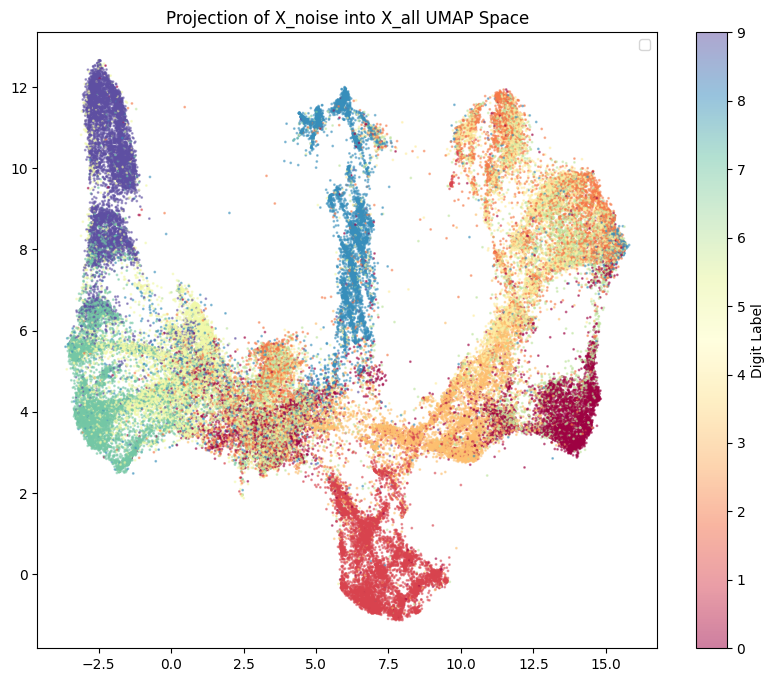

In [7]:
data = "FashionMNIST"
L=2
PI=196
eps=2
label_epsilon=0
fname = f"../../data/FashionMNIST/CWALDP/add_noise/fmnist_full_L{L}_PI{PI}_epsilon{eps}_label_epsilon{label_epsilon}.npz"
dat = np.load(fname, allow_pickle=True)
X_noise = np.asarray(dat["X_all_noise"])
y_noise = np.asarray(dat["y_all_noise"] )
n_samples = X_noise.shape[0]
X_noise_flat = X_noise.reshape(n_samples, -1)
# 3. ノイズデータを同じ空間に投影
# fit_transform ではなく、学習済みの reducer に対して transform を使います
embedding_noise = reducer.transform(X_noise_flat)

# 4. 可視化（重ねて表示）
plt.figure(figsize=(10, 8))

# ノイズデータを強調して表示
plt.scatter(embedding_noise[:, 0], embedding_noise[:, 1], 
            c=y_noise, cmap='Spectral', s=1, alpha=0.5)

plt.colorbar(label='Digit Label')
plt.legend()
plt.title("Projection of X_noise into X_all UMAP Space")
plt.show()

/tmp/ipykernel_112287/3068007699.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


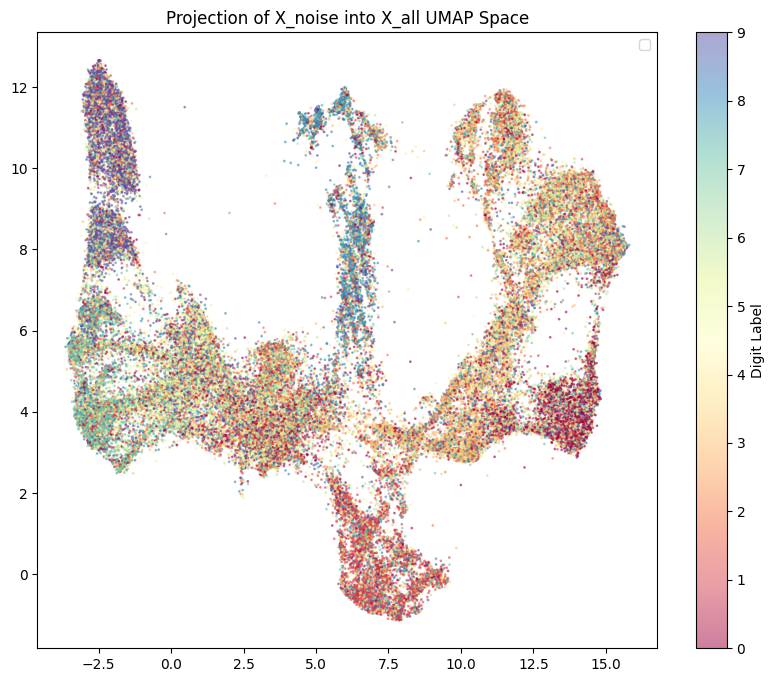

In [6]:
data = "FashionMNIST"
L=2
PI=196
eps=2
label_epsilon=2
fname = f"../../data/FashionMNIST/CWALDP/add_noise/fmnist_full_L{L}_PI{PI}_epsilon{eps}_label_epsilon{label_epsilon}.npz"
dat = np.load(fname, allow_pickle=True)
X_noise = np.asarray(dat["X_all_noise"])
y_noise = np.asarray(dat["y_all_noise"] )
n_samples = X_noise.shape[0]
X_noise_flat = X_noise.reshape(n_samples, -1)
# 3. ノイズデータを同じ空間に投影
# fit_transform ではなく、学習済みの reducer に対して transform を使います
embedding_noise = reducer.transform(X_noise_flat)

# 4. 可視化（重ねて表示）
plt.figure(figsize=(10, 8))

# ノイズデータを強調して表示
plt.scatter(embedding_noise[:, 0], embedding_noise[:, 1], 
            c=y_noise, cmap='Spectral', s=1, alpha=0.5)

plt.colorbar(label='Digit Label')
plt.legend()
plt.title("Projection of X_noise into X_all UMAP Space")
plt.show()

In [5]:
import numpy as np
from scipy.spatial.distance import pdist

# --- 既存の読み込みコード (前提) ---
# data="FashionMNIST"
# original_path = f"../../data/{data}/CWALDP/fmnist_full_L2_PI0.5.npz"
# dat = np.load(original_path, allow_pickle=True)
# X_all = np.asarray(dat["X_disc"])
# y_all = np.asarray(dat["y_disc"] if "y_disc" in dat.files else dat["y_all"])

# --- クラスごとの平均差分を計算する処理 ---

# 1. データを1次元ベクトルに変換 (N, 28, 28) -> (N, 784)
# ※既に (N, 784) の場合でもこの処理は安全に動作します
data = "FashionMNIST"
original_path = f"../../data/{data}/CWALDP/fmnist_full_L2_PI0.5.npz"
dat = np.load(original_path, allow_pickle=True)
X_all = np.asarray(dat["X_disc"])
print(np.unique(X_all))
y_all = np.asarray(dat["y_disc"] if "y_disc" in dat.files else dat["y_all"])
X_flat = X_all.reshape(X_all.shape[0], -1)

# FashionMNISTのクラス名定義（表示用）
class_names = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}

print(f"{'Label':<6} | {'Class Name':<12} | {'Mean Difference (L2)':<20} | {'Samples':<8}")
print("-" * 60)

unique_labels = np.unique(y_all)
for label in sorted(unique_labels):
    # そのクラスに属する画像を抽出
    indices = np.where(y_all == label)[0]
    X_subset = X_flat[indices]
    
    # 2. 画像間のペアワイズ距離を計算
    # pdist は全組み合わせの距離を効率的に計算して返します
    # metric='euclidean' (L2距離) を使用。'cityblock' (L1距離) に変更も可能
    if len(X_subset) > 1:
        distances = pdist(X_subset, metric='euclidean')
        avg_dist = np.mean(distances)
    else:
        avg_dist = 0.0
        
    # 結果の表示
    name = class_names.get(int(label), "Unknown")
    print(f"{int(label):<6} | {name:<12} | {avg_dist:<20.4f} | {len(X_subset):<8}")

[ 64 192]
Label  | Class Name   | Mean Difference (L2) | Samples 
------------------------------------------------------------
0      | T-shirt/top  | 893.5379             | 7000    
1      | Trouser      | 661.6968             | 7000    
2      | Pullover     | 956.9474             | 7000    
3      | Dress        | 769.4870             | 7000    
4      | Coat         | 841.9691             | 7000    
5      | Sandal       | 716.6894             | 7000    
6      | Shirt        | 971.0249             | 7000    
7      | Sneaker      | 655.2946             | 7000    
8      | Bag          | 977.3682             | 7000    
9      | Ankle boot   | 780.9355             | 7000    


In [3]:
import numpy as np
from scipy.spatial.distance import pdist

# --- 既存の読み込みコード (前提) ---
# data="FashionMNIST"
# original_path = f"../../data/{data}/CWALDP/fmnist_full_L2_PI0.5.npz"
# dat = np.load(original_path, allow_pickle=True)
# X_all = np.asarray(dat["X_disc"])
# y_all = np.asarray(dat["y_disc"] if "y_disc" in dat.files else dat["y_all"])

# --- クラスごとの平均差分を計算する処理 ---

# 1. データを1次元ベクトルに変換 (N, 28, 28) -> (N, 784)
# ※既に (N, 784) の場合でもこの処理は安全に動作します
data = "FashionMNIST"
L=4
PI=49
eps=2
label_epsilon=0
fname = f"../../data/FashionMNIST/CWALDP/add_noise/fmnist_full_L{L}_PI{PI}_epsilon{eps}_label_epsilon{label_epsilon}.npz"
dat = np.load(fname, allow_pickle=True)
X_noise = np.asarray(dat["X_all_noise"])
y_noise = np.asarray(dat["y_all_noise"] )
n_samples = X_noise.shape[0]
X_noise_flat = X_noise.reshape(n_samples, -1)

# FashionMNISTのクラス名定義（表示用）
class_names = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}

print(f"{'Label':<6} | {'Class Name':<12} | {'Mean Difference (L2)':<20} | {'Samples':<8}")
print("-" * 60)

unique_labels = np.unique(y_noise)
for label in sorted(unique_labels):
    # そのクラスに属する画像を抽出
    indices = np.where(y_noise == label)[0]
    X_subset = X_noise_flat[indices]
    
    # 2. 画像間のペアワイズ距離を計算
    # pdist は全組み合わせの距離を効率的に計算して返します
    # metric='euclidean' (L2距離) を使用。'cityblock' (L1距離) に変更も可能
    if len(X_subset) > 1:
        distances = pdist(X_subset, metric='euclidean')
        avg_dist = np.mean(distances)
    else:
        avg_dist = 0.0
        
    # 結果の表示
    name = class_names.get(int(label), "Unknown")
    print(f"{int(label):<6} | {name:<12} | {avg_dist:<20.4f} | {len(X_subset):<8}")

Label  | Class Name   | Mean Difference (L2) | Samples 
------------------------------------------------------------
0      | T-shirt/top  | 677.6588             | 7000    
1      | Trouser      | 653.1987             | 7000    
2      | Pullover     | 667.9637             | 7000    
3      | Dress        | 670.2752             | 7000    
4      | Coat         | 657.5301             | 7000    
5      | Sandal       | 646.8050             | 7000    
6      | Shirt        | 679.4278             | 7000    
7      | Sneaker      | 640.9943             | 7000    
8      | Bag          | 672.2938             | 7000    
9      | Ankle boot   | 650.0867             | 7000    
